<a href="https://colab.research.google.com/github/Chirag314/Autompg-bootstrap-cv/blob/main/Autompg_bootstrap_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###This notebook is copied from exercises from book Ensemble Machine Learning Cookbook.

In [1]:
#import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold,LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import resample

In [2]:
# Read data from github. Use raw format and copy url# Note normal url and raw url will be different.
import pandas as pd
pd.options.display.max_rows=None
pd.options.display.max_columns=None
url = 'https://raw.githubusercontent.com/PacktPublishing/Ensemble-Machine-Learning-Cookbook/master/Chapter03/autompg.csv'
df_autodata = pd.read_csv(url)
#df = pd.read_csv(url)
print(df_autodata.head(5))

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin                    carname  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


In [3]:
#Check the shape of data
df_autodata.shape

(398, 9)

In [4]:
# Check for missing values.
df_autodata.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
carname         0
dtype: int64

#####Here, we can see that there are missing values in data. Impute missing values with median.Now separate predictor and response variable into two different dataframes

In [5]:
df_autodata['horsepower'].fillna(df_autodata['horsepower'].median(),inplace=True)
#Drop 'carname' variable
df_autodata.drop(['carname'],axis=1,inplace=True)



#####We write a custom function, create_bootstrap_oob(), which takes a DataFrame as a parameter and uses the resample() function from sklearn.utils to create a bootstrap sample with 100 observations:

In [7]:
# Create feature and response variables

def create_bootstrap_oob(df):
  global df_OOB
  global df_bootstrap_sample

  #Creating bootstrap sample
  df_bootstrap_sample = resample(df,replace=True, n_samples=100)

  #Creating the oob sample
  bootstrap_sample_index=tuple(df_bootstrap_sample.index)
  bootstrap_df=df.index.isin(bootstrap_sample_index)
  df_OOB=df[~bootstrap_df]

#####We loop through 50 iterations and call the custom function by passing the df_autodata DataFrame. We capture the mean of the mpg variable for each bootstrap sample, which we'll measure against the mean of the mpg variable in our original DataFrame, which is df_autodata:

In [8]:
iteration=50
bootstap_statistics=list()
originalsample_statistics=list()

for i in range(iteration):
  #call custom function create_bootstrap_oob
  create_bootstrap_oob(df_autodata)

  #Capture mean value of mpg variable
  bootstap_statistics.append(df_bootstrap_sample.iloc[:,0].mean())

  originalsample_statistics.append(df_autodata['mpg'].mean())

We plot the mean of the mpg variable for each iteration, for which a separate bootstrap sample has been considered. We capture the mean of the mpg variable for each bootstrap sample in each iteration:

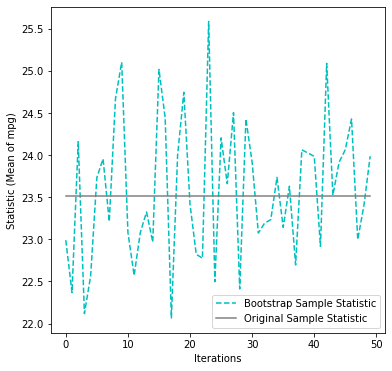

In [9]:
## Let us plot the model
f, ax= plt.subplots(figsize=(6,6))

plt.plot(bootstap_statistics, 'c--', label='Bootstrap Sample Statistic')
plt.plot(originalsample_statistics, 'grey', label='Original Sample Statistic')
plt.xlabel('Iterations')
plt.ylabel('Statistic (Mean of mpg)')
plt.legend(loc=4)
plt.show()